In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math

%matplotlib inline
rcParams['font.family'] = 'Times New Roman'
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

Text(0.5, 1.0, 'Потери при распространении в свободном пространстве')

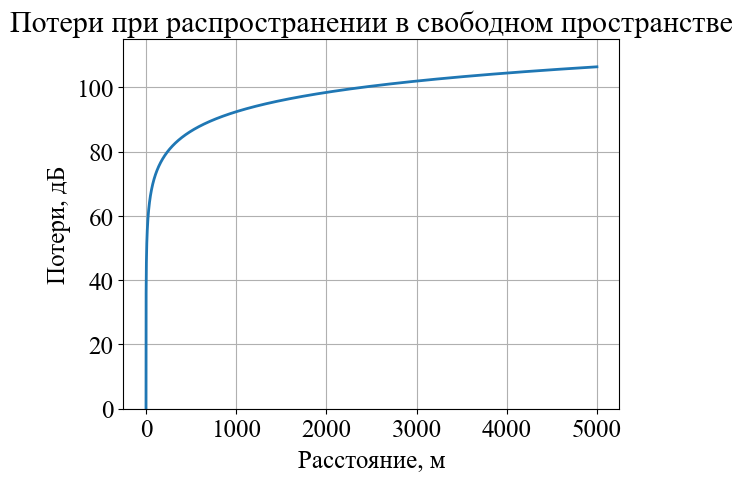

In [12]:
# В свободном пространстве

d = np.linspace(0.01, 5000, 10000)      # массив расстояний
freq = 996 * 10 ** 6                    # частота
Los_freespace = -147.56 + 20 * np.log10(freq) + 20 * np.log10(d)

plt.plot(d, Los_freespace)
plt.grid(True)
plt.xlabel('Расстояние, м')
plt.ylabel('Потери, дБ')
plt.ylim(0,115)
plt.title('Потери при распространении в свободном пространстве')

In [ ]:
# Модель Окамуры
